In [6]:
import os
import os.path
import datetime
from pathlib import Path

import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [ ]:
%%time
spd_o = 'SPD_Objects'
dir_o = '/glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/annual_feature_frequ/'

is_current = True

if is_current == True:
    year_s = 2000
    year_e = 2020
    flnm_o = dir_o + 'spd_obj_c.npy'
else:
    year_s = 2070
    year_e = 2100
    flnm_o = dir_o + 'spd_obj_f.npy'

if os.path.exists(flnm_o):
    spd_obj_c = np.load(flnm_o)
    plt.pcolormesh(range(spd_obj_c.shape[1]), range(spd_obj_c.shape[0]), spd_obj_c)
else:
    Years = np.arange(year_s, year_e + 1)

    n_mem = 9
    is_first = True
    nn = 0
    for mem in np.arange(2, n_mem+1):
        mem_s = str(mem).zfill(3)
        dir_hr  = '/glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/' + mem_s + '/'
        print(mem_s)
        for year in Years:
            YYYY = str(year)
            if mem_s == '003':
                flnm = dir_hr + YYYY + '01_03_ObjectMasks__dt-6h_MOAAP-masks.nc'
            elif mem_s == '002':
                flnm = dir_hr + YYYY + '01_02_ObjectMasks__dt-6h_MOAAP-masks.nc'
            else:
                flnm = dir_hr + YYYY + '01_' + mem_s + '_ObjectMasks__dt-6h_MOAAP-masks.nc'

            print('Reading: ' + flnm)
        
            ncid = Dataset(flnm, mode='r')
            # convert instances of 'netCDF4._netCDF4.Variable' to numpy array by using[:]
            spd_obj_tmp = np.mean(ncid.variables[spd_o][:]> 0,  axis=0)

            #with xr.open_dataset(flnm) as ds:
            #    spd_obj_tmp = ds[spd_o].mean(dim='time')
                
            if is_first == True:
                spd_obj = spd_obj_tmp.copy()
                is_first = False
            else:
                spd_obj = spd_obj + spd_obj_tmp

            nn = nn + 1
    spd_obj_c = spd_obj/nn

    # npy and npz files preserve information such as data type (dtype) and shape.
    np.save(flnm_o, spd_obj_c ) 


002
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200001_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200101_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200201_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200301_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200401_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200501_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200601_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200701_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/200801_02_ObjectMasks__dt-6h_MOAAP-masks.nc
Reading: /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/002/

In [49]:
type(spd_obj_c)

xarray.core.dataarray.DataArray

In [38]:
np.save('test.npy',spd_obj_c )

In [39]:
a_npy = np.load('test.npy')
a_npy.shape

(720, 1440)

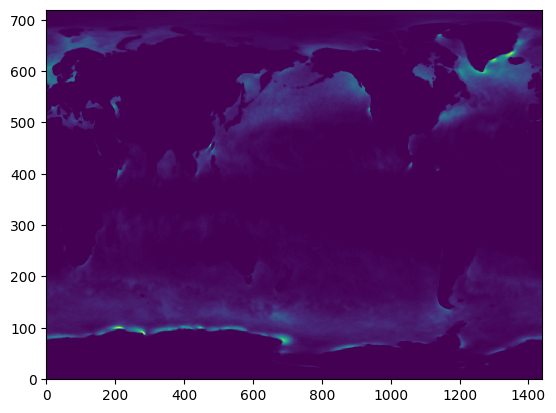

In [44]:

fig, ax = plt.subplots()
ax.pcolormesh(range(a_npy.shape[1]), range(a_npy.shape[0]), a_npy)

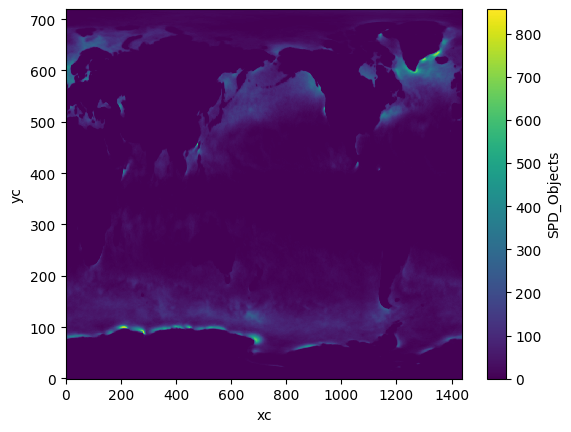

In [45]:
spd_obj_c.plot()